In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option("display.max_columns", None)

pd.set_option("display.max_rows", 200)

In [2]:
sns.set()
sns.set_palette(palette='deep')

In [3]:
df_survey_tr = pd.read_csv(r'C:\Users\User\OneDrive\Desktop\HACKATHON\Surveydata_train_(1).csv')

In [4]:
df_travel_tr = pd.read_csv(r'C:\Users\User\OneDrive\Desktop\HACKATHON\Traveldata_train_(1).csv')

In [5]:
df_survey_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       94379 non-null  int64 
 1   Overall_Experience       94379 non-null  int64 
 2   Seat_comfort             94318 non-null  object
 3   Seat_Class               94379 non-null  object
 4   Arrival_time_convenient  85449 non-null  object
 5   Catering                 85638 non-null  object
 6   Platform_location        94349 non-null  object
 7   Onboardwifi_service      94349 non-null  object
 8   Onboard_entertainment    94361 non-null  object
 9   Online_support           94288 non-null  object
 10  Onlinebooking_Ease       94306 non-null  object
 11  Onboard_service          86778 non-null  object
 12  Leg_room                 94289 non-null  object
 13  Baggage_handling         94237 non-null  object
 14  Checkin_service          94302 non-nul

In [6]:
df_travel_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      94379 non-null  int64  
 1   Gender                  94302 non-null  object 
 2   CustomerType            85428 non-null  object 
 3   Age                     94346 non-null  float64
 4   TypeTravel              85153 non-null  object 
 5   Travel_Class            94379 non-null  object 
 6   Travel_Distance         94379 non-null  int64  
 7   DepartureDelay_in_Mins  94322 non-null  float64
 8   ArrivalDelay_in_Mins    94022 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 6.5+ MB


In [7]:
df_survey_tr_c1 = df_survey_tr.copy()

In [8]:
df_travel_tr_c1 = df_travel_tr.copy()

In [9]:
object_df_sur = df_survey_tr.select_dtypes(include='object')

In [10]:
object_df_sur.columns

Index(['Seat_comfort', 'Seat_Class', 'Arrival_time_convenient', 'Catering',
       'Platform_location', 'Onboardwifi_service', 'Onboard_entertainment',
       'Online_support', 'Onlinebooking_Ease', 'Onboard_service', 'Leg_room',
       'Baggage_handling', 'Checkin_service', 'Cleanliness',
       'Online_boarding'],
      dtype='object')

In [11]:
for column in object_df_sur.columns:
    print(object_df_sur[column].value_counts())
    print('--------------------------------------------')

acceptable          21158
need improvement    20946
good                20595
poor                15185
excellent           12971
extremely poor       3463
Name: Seat_comfort, dtype: int64
--------------------------------------------
Green Car    47435
Ordinary     46944
Name: Seat_Class, dtype: int64
--------------------------------------------
good                19574
excellent           17684
acceptable          15177
need improvement    14990
poor                13692
extremely poor       4332
Name: Arrival_time_convenient, dtype: int64
--------------------------------------------
acceptable          18468
need improvement    17978
good                17969
poor                13858
excellent           13455
extremely poor       3910
Name: Catering, dtype: int64
--------------------------------------------
manageable           24173
Convinient           21912
need improvement     17832
Inconvinient         16449
very convinient      13981
very inconvinient        2
Name: Platform_

In [12]:
object_df_tra = df_travel_tr.select_dtypes(include='object')

In [13]:
object_df_tra.columns

Index(['Gender', 'CustomerType', 'TypeTravel', 'Travel_Class'], dtype='object')

In [14]:
for column in object_df_tra.columns:
    print(object_df_tra[column].value_counts())
    print('--------------------------------------------')

Female    47815
Male      46487
Name: Gender, dtype: int64
--------------------------------------------
Loyal Customer       69823
disloyal Customer    15605
Name: CustomerType, dtype: int64
--------------------------------------------
Business travel    58617
Personal Travel    26536
Name: TypeTravel, dtype: int64
--------------------------------------------
Eco         49342
Business    45037
Name: Travel_Class, dtype: int64
--------------------------------------------


In [15]:
merged_df = pd.merge(df_survey_tr_c1, df_travel_tr_c1, on='ID')

In [16]:
merged_df_c1 = merged_df.copy()

In [17]:
merged_df_c1.isnull().sum()[merged_df_c1.isnull().sum()>0]

Seat_comfort                 61
Arrival_time_convenient    8930
Catering                   8741
Platform_location            30
Onboardwifi_service          30
Onboard_entertainment        18
Online_support               91
Onlinebooking_Ease           73
Onboard_service            7601
Leg_room                     90
Baggage_handling            142
Checkin_service              77
Cleanliness                   6
Online_boarding               6
Gender                       77
CustomerType               8951
Age                          33
TypeTravel                 9226
DepartureDelay_in_Mins       57
ArrivalDelay_in_Mins        357
dtype: int64

In [18]:
merged_df_c1.dropna(inplace=True)

In [19]:
# All the null values are either imputed or dropped

In [20]:
merged_df_c1.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,55503.0,NaN,NaN,NaN,98847116.827595,27248.405798,98800002.0,98823485.5,98846999.0,98870778.5,98894376.0
Overall_Experience,55503.0,NaN,NaN,NaN,0.546889,0.497801,0.0,0.0,1.0,1.0,1.0
Seat_comfort,55503,6,need improvement,12410,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Seat_Class,55503,2,Green Car,27940,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arrival_time_convenient,55503,6,good,12716,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Catering,55503,6,acceptable,11930,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Platform_location,55503,6,manageable,14281,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Onboardwifi_service,55503,6,good,13479,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Onboard_entertainment,55503,6,good,17928,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Online_support,55503,5,good,17699,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='Age'>

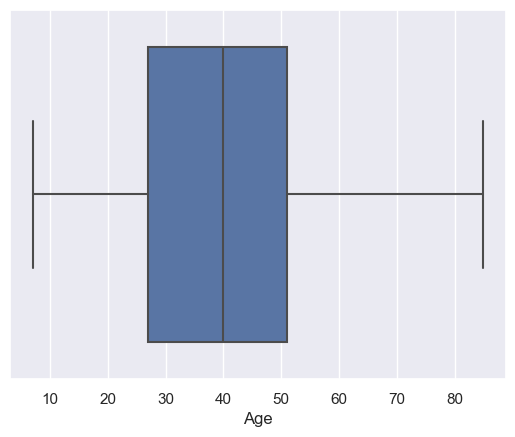

In [21]:
sns.boxplot(data=merged_df_c1,x='Age')

<Axes: xlabel='Travel_Distance'>

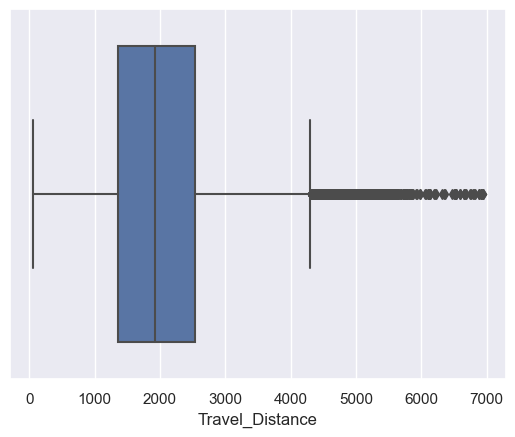

In [22]:
sns.boxplot(data=merged_df_c1,x='Travel_Distance')

<Axes: xlabel='DepartureDelay_in_Mins'>

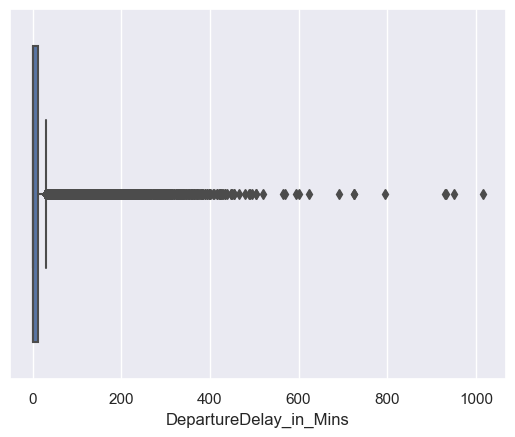

In [23]:
sns.boxplot(data=merged_df_c1,x='DepartureDelay_in_Mins')

<Axes: xlabel='ArrivalDelay_in_Mins'>

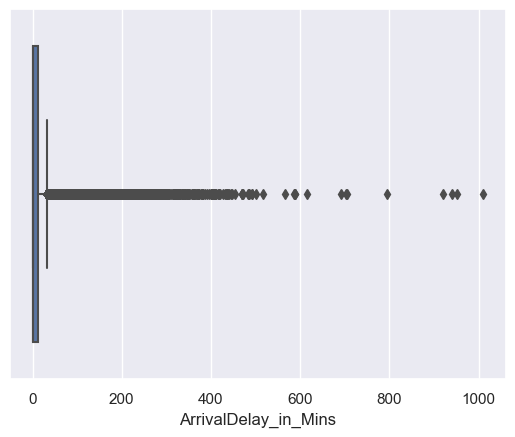

In [24]:
sns.boxplot(data=merged_df_c1,x='ArrivalDelay_in_Mins')

In [25]:
merged_df_c1.to_csv('merged_data_train_c1.csv', index=False)

In [26]:
df_survey_tes = pd.read_csv(r'C:\Users\User\OneDrive\Desktop\HACKATHON\Surveydata_test.csv')

In [27]:
df_travel_tes = pd.read_csv(r'C:\Users\User\OneDrive\Desktop\HACKATHON\Traveldata_test.csv')

In [28]:
df_survey_tes_c1 = df_survey_tes.copy()

In [29]:
df_travel_tes_c1 = df_travel_tes.copy()

In [30]:
df_survey_tes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35602 entries, 0 to 35601
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       35602 non-null  int64 
 1   Seat_comfort             35580 non-null  object
 2   Seat_Class               35602 non-null  object
 3   Arrival_time_convenient  32277 non-null  object
 4   Catering                 32245 non-null  object
 5   Platform_location        35590 non-null  object
 6   Onboardwifi_service      35590 non-null  object
 7   Onboard_entertainment    35594 non-null  object
 8   Online_support           35576 non-null  object
 9   Onlinebooking_Ease       35584 non-null  object
 10  Onboard_service          32730 non-null  object
 11  Leg_room                 35577 non-null  object
 12  Baggage_handling         35562 non-null  object
 13  Checkin_service          35580 non-null  object
 14  Cleanliness              35600 non-nul

In [31]:
df_travel_tes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35602 entries, 0 to 35601
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      35602 non-null  int64  
 1   Gender                  35572 non-null  object 
 2   CustomerType            32219 non-null  object 
 3   Age                     35591 non-null  float64
 4   TypeTravel              32154 non-null  object 
 5   Travel_Class            35602 non-null  object 
 6   Travel_Distance         35602 non-null  int64  
 7   DepartureDelay_in_Mins  35573 non-null  float64
 8   ArrivalDelay_in_Mins    35479 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 2.4+ MB


In [32]:
df_survey_tes.isnull().sum()

ID                            0
Seat_comfort                 22
Seat_Class                    0
Arrival_time_convenient    3325
Catering                   3357
Platform_location            12
Onboardwifi_service          12
Onboard_entertainment         8
Online_support               26
Onlinebooking_Ease           18
Onboard_service            2872
Leg_room                     25
Baggage_handling             40
Checkin_service              22
Cleanliness                   2
Online_boarding               2
dtype: int64

In [33]:
df_survey_tes_c1.isnull().sum()[df_survey_tes_c1.isnull().sum()>0]

Seat_comfort                 22
Arrival_time_convenient    3325
Catering                   3357
Platform_location            12
Onboardwifi_service          12
Onboard_entertainment         8
Online_support               26
Onlinebooking_Ease           18
Onboard_service            2872
Leg_room                     25
Baggage_handling             40
Checkin_service              22
Cleanliness                   2
Online_boarding               2
dtype: int64

In [34]:
df_travel_tes.isnull().sum()

ID                           0
Gender                      30
CustomerType              3383
Age                         11
TypeTravel                3448
Travel_Class                 0
Travel_Distance              0
DepartureDelay_in_Mins      29
ArrivalDelay_in_Mins       123
dtype: int64

In [35]:
from sklearn.impute import SimpleImputer

for col in df_survey_tes_c1.columns:
    if df_survey_tes_c1[col].isna().sum()>0:
        imputer = SimpleImputer(strategy='most_frequent')
        df_survey_tes_c1[col] = imputer.fit_transform(df_survey_tes_c1[[col]])

In [36]:
from sklearn.impute import SimpleImputer

for col in df_travel_tes_c1.columns:
    if df_travel_tes_c1[col].isna().sum()>0:
        imputer = SimpleImputer(strategy='most_frequent')
        df_travel_tes_c1[col] = imputer.fit_transform(df_travel_tes_c1[[col]])

In [37]:
merged_df_tes = pd.merge(df_survey_tes_c1, df_travel_tes_c1, on='ID')

In [38]:
merged_df_tes_c1 = merged_df_tes.copy()

In [39]:
merged_df_tes_c1.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,35602.0,NaN,NaN,NaN,99917801.5,10277.556478,99900001.0,99908901.25,99917801.5,99926701.75,99935602.0
Seat_comfort,35602,6,acceptable,8025,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Seat_Class,35602,2,Ordinary,17860,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arrival_time_convenient,35602,6,good,10686,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Catering,35602,6,acceptable,10490,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Platform_location,35602,5,manageable,9376,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Onboardwifi_service,35602,6,good,8755,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Onboard_entertainment,35602,6,good,11444,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Online_support,35602,5,good,11513,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Onlinebooking_Ease,35602,6,good,11043,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
merged_df_tes_c1.to_csv('merged_data_test_c1.csv', index=False)

In [41]:
merged_df_tes_c1.isna().sum()

ID                         0
Seat_comfort               0
Seat_Class                 0
Arrival_time_convenient    0
Catering                   0
Platform_location          0
Onboardwifi_service        0
Onboard_entertainment      0
Online_support             0
Onlinebooking_Ease         0
Onboard_service            0
Leg_room                   0
Baggage_handling           0
Checkin_service            0
Cleanliness                0
Online_boarding            0
Gender                     0
CustomerType               0
Age                        0
TypeTravel                 0
Travel_Class               0
Travel_Distance            0
DepartureDelay_in_Mins     0
ArrivalDelay_in_Mins       0
dtype: int64

In [42]:
merged_df_c1.isna().sum()

ID                         0
Overall_Experience         0
Seat_comfort               0
Seat_Class                 0
Arrival_time_convenient    0
Catering                   0
Platform_location          0
Onboardwifi_service        0
Onboard_entertainment      0
Online_support             0
Onlinebooking_Ease         0
Onboard_service            0
Leg_room                   0
Baggage_handling           0
Checkin_service            0
Cleanliness                0
Online_boarding            0
Gender                     0
CustomerType               0
Age                        0
TypeTravel                 0
Travel_Class               0
Travel_Distance            0
DepartureDelay_in_Mins     0
ArrivalDelay_in_Mins       0
dtype: int64